<a href="https://colab.research.google.com/github/Asleik/rock-paper-scissors/blob/main/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Rock, Paper and Scissors



#### Imports

In [20]:
import random
import re

## rock_paper_scissors

This is responsible for calling all of the other methods.

In [21]:
def rock_paper_scissors(matches):
    player_wins = 0
    cpu_wins = 0

    for match in range(matches):
        print_match_intro(match, matches)
        player_input = player_choice()
        cpu_input = cpu_hand_chooser()
        player_wins, cpu_wins = face_off(player_input, cpu_input, player_wins, cpu_wins)
        print_scoreboard(cpu_wins, player_wins)

    print_ending_results(cpu_wins, player_wins)

## player_choice

Simple RegEx for input validation.

> For more information, look for [Regular Expression](https://en.wikipedia.org/wiki/Regular_expression)

I like to use [RegEx Pal](https://www.regexpal.com/) for checking.

Note: This `\b` isn't in the code because it is already being enforced by the `.fullmatch()`.

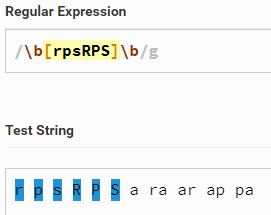

In [22]:
def player_choice():
    # uses RegEx to validade player input
    re_pattern = re.compile('[rpsRPS]')

    while True:
        player_input = input('Choose one: [R]ock - [P]aper - [S]cissor\n')
        is_valid_player_input = re_pattern.fullmatch(player_input)
        if not is_valid_player_input:
            print(f'what the heck is {player_input}???')
        else:
            print(f'Player showed: {player_input}')
            break

    return player_input.lower()

## cpu_hand_chooser

Random generated cpu input.

> For more information on [Random](https://docs.python.org/3/library/random.html#module-random).

In [23]:
def cpu_hand_chooser():
    # just choose a random hand for CPU
    cpu_choice_number = random.randrange(3)
    hand = ['r', 'p', 's']
    print(f'CPU showed: {hand[cpu_choice_number]}')
    return hand[cpu_choice_number]

## print_match_intro

In [24]:
def print_match_intro(match, matches):
    print('\n')
    if match == matches - 1:
        print('It\'s time for the last match')
    else:
        print(f'It\'s time for the match number {match + 1}!')

## face_off

Using dict for better readability.

> For more information, look for [Dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) and  [Zip Method (Build In)](https://docs.python.org/3/library/functions.html#zip).

In [25]:
def face_off(player_input, cpu_input, player_wins, cpu_wins):
    # compare player and cpu hands, in this specific order
    input_combination_list = ['rr', 'rp', 'rs',
                              'pp', 'ps', 'pr',
                              'ss', 'sr', 'sp']
    output_combination_list = [['draw', 0, 0],
                               ['CPU Won', 0, 1],
                               ['Player Won', 1, 0]]
    results_map = dict(zip(input_combination_list, output_combination_list*3))

    print(results_map[player_input + cpu_input][0])
    return player_wins + results_map[player_input + cpu_input][1], \
           cpu_wins + results_map[player_input + cpu_input][2]

## print_scoreboard

In [26]:
def print_scoreboard(cpu_wins, player_wins):
    print(f'\n----Scoreboard-----')
    print('  Player  |   CPU   ')
    print('----------|---------')
    print(f'     {player_wins}    |    {cpu_wins}')
    print('--------------------')

## print_ending_results

In [27]:
def print_ending_results(cpu_wins, player_wins):
    print('\n')
    if player_wins > cpu_wins:
        print('The human has won!')
    if player_wins < cpu_wins:
        print('The CPU has won!')
    if player_wins == cpu_wins:
        print('We got no winners')

# RUN

The argument is the number of matches.

In [28]:
rock_paper_scissors(3)



It's time for the match number 1!
Choose one: [R]ock - [P]aper - [S]cissor
r
Player showed: r
CPU showed: s
Player Won

----Scoreboard-----
  Player  |   CPU   
----------|---------
     1    |    0
--------------------


It's time for the match number 2!
Choose one: [R]ock - [P]aper - [S]cissor
s
Player showed: s
CPU showed: s
draw

----Scoreboard-----
  Player  |   CPU   
----------|---------
     1    |    0
--------------------


It's time for the last match
Choose one: [R]ock - [P]aper - [S]cissor
p
Player showed: p
CPU showed: s
CPU Won

----Scoreboard-----
  Player  |   CPU   
----------|---------
     1    |    1
--------------------


We got no winners
